Test accuracy: 86.96%
              precision    recall  f1-score   support

        mild       0.83      0.84      0.83        51
    moderate       0.89      0.97      0.93        61
      severe       0.88      0.78      0.83        49

    accuracy                           0.87       161
   macro avg       0.87      0.86      0.86       161
weighted avg       0.87      0.87      0.87       161



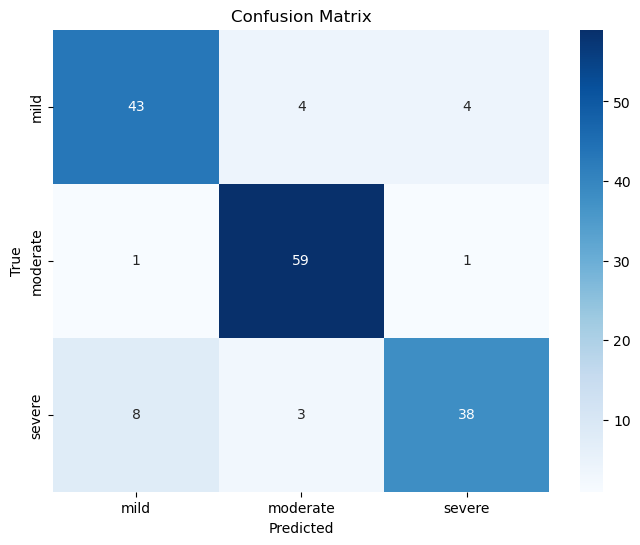

In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Set paths to the directories containing the images
base_dir = 'labeled_data'  
categories = ['mild', 'moderate', 'severe']

# Image properties
img_height = 150
img_width = 150

# Function to load and preprocess images
def load_images(base_dir, categories, img_height, img_width):
    data = []
    labels = []

    for category in categories:
        category_path = os.path.join(base_dir, category)
        for filename in os.listdir(category_path):
            img_path = os.path.join(category_path, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (img_width, img_height))  # Resize image
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale (optional)
            img = img.flatten()  # Flatten image into a 1D array
            data.append(img)
            labels.append(category)

    return np.array(data), np.array(labels)

# Load the dataset
data, labels = load_images(base_dir, categories, img_height, img_width)

# Normalize pixel values to [0, 1] and encode labels
data = data / 255.0  # Normalize the images

# Encode the labels as integers
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Dimensionality Reduction (optional, but helpful for large images)
pca = PCA(n_components=50)  # Reduce dimensionality to 50 features
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Train a classifier (e.g., Random Forest, SVM, or Logistic Regression)
# Option 1: Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Option 2: Support Vector Machine (SVM) Classifier
# model = SVC(kernel='linear', random_state=42)

# Option 3: Logistic Regression
# model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy * 100:.2f}%")

# Print classification report (optional)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Optionally, plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, columns=label_encoder.classes_, index=label_encoder.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()